In [10]:
import numpy as np
import pandas as pd
data=pd.read_csv("pca.csv")
data

,Unnamed: 0,Target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,2,-3.227442,3.623462,-3.518770,1.647767,1.919065,-0.604967,-0.700347,-1.383422,0.462842,-0.485182,-0.289933,0.482988,-0.264659,0.180296,-0.026833,0.136735
1,1,2,-2.153681,-4.995571,2.280726,0.658663,4.630375,1.508473,1.111974,0.364459,0.390088,0.337705,-0.389267,1.179507,2.372615,-0.149782,1.014216,0.011796
2,2,0,6.952544,2.788518,0.845397,2.658899,-0.393515,0.008286,-1.157555,3.721536,-0.155376,4.065462,-0.661878,-1.676188,0.465089,-2.221053,-0.652944,-0.583872
3,3,1,-0.221666,-2.236775,-2.092082,0.188481,-1.616459,3.105127,2.938922,-1.981830,-4.687964,0.546906,0.114948,-1.279641,0.713472,-0.011543,-0.182976,-0.838924
4,4,2,-1.344174,-4.242644,0.268881,-0.557006,1.173350,-0.089336,-0.061116,-0.550773,0.191786,0.315702,0.128453,0.252563,0.181401,-0.732279,0.547377,0.402242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261533,261533,0,5.608351,1.127087,-0.458629,-0.989226,0.038547,0.168162,-0.109319,0.529503,0.231805,-0.423401,0.861013,0.472000,-0.033785,0.201076,-0.525767,-0.406536
261534,261534,2,-6.464639,5.351527,3.554163,-3.344202,-0.514653,-1.410879,1.169521,1.955731,-0.820576,-0.085948,0.209744,1.732782,-1.172415,-0.569494,-0.738653,0.308730
261535,261535,2,-0.843823,-3.608118,-0.383222,-0.286574,-0.417274,-1.003410,-0.346122,-0.736675,0.178350,1.045505,0.092450,-0.015635,0.126455,-0.817593,0.323128,0.277472
261536,261536,2,0.627391,-1.896258,-1.418630,-0.732453,-1.097661,0.374180,1.400047,-0.084419,0.629819,-0.527325,-1.033112,-0.445519,0.603182,0.818126,-1.191142,-0.140995


In [2]:
dataset=data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Standardize the data (excluding the target column)
features = dataset.drop(columns=['Target'])  # Assuming 'Target' is the categorical label
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_features)

# 3. Check how much variance each component explains
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)

# Print the total variance retained by selected components
print(f'Total Variance Explained: {total_variance:.2f}')

# 4. Transform the data using the selected principal components
pca_data = pd.DataFrame(principal_components)


Total Variance Explained: 0.96


In [8]:
import torch
pca_data=pd.concat([data["Target"],pca_data],axis=1)
pca_data

,Target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2,-3.227442,3.623462,-3.518770,1.647767,1.919065,-0.604967,-0.700347,-1.383422,0.462842,-0.485182,-0.289933,0.482988,-0.264659,0.180296,-0.026833,0.136735
1,2,-2.153681,-4.995571,2.280726,0.658663,4.630375,1.508473,1.111974,0.364459,0.390088,0.337705,-0.389267,1.179507,2.372615,-0.149782,1.014216,0.011796
2,0,6.952544,2.788518,0.845397,2.658899,-0.393515,0.008286,-1.157555,3.721536,-0.155376,4.065462,-0.661878,-1.676188,0.465089,-2.221053,-0.652944,-0.583872
3,1,-0.221666,-2.236775,-2.092082,0.188481,-1.616459,3.105127,2.938922,-1.981830,-4.687964,0.546906,0.114948,-1.279641,0.713472,-0.011543,-0.182976,-0.838924
4,2,-1.344174,-4.242644,0.268881,-0.557006,1.173350,-0.089336,-0.061116,-0.550773,0.191786,0.315702,0.128453,0.252563,0.181401,-0.732279,0.547377,0.402242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261533,0,5.608351,1.127087,-0.458629,-0.989226,0.038547,0.168162,-0.109319,0.529503,0.231805,-0.423401,0.861013,0.472000,-0.033785,0.201076,-0.525767,-0.406536
261534,2,-6.464639,5.351527,3.554163,-3.344202,-0.514653,-1.410879,1.169521,1.955731,-0.820576,-0.085948,0.209744,1.732782,-1.172415,-0.569494,-0.738653,0.308730
261535,2,-0.843823,-3.608118,-0.383222,-0.286574,-0.417274,-1.003410,-0.346122,-0.736675,0.178350,1.045505,0.092450,-0.015635,0.126455,-0.817593,0.323128,0.277472
261536,2,0.627391,-1.896258,-1.418630,-0.732453,-1.097661,0.374180,1.400047,-0.084419,0.629819,-0.527325,-1.033112,-0.445519,0.603182,0.818126,-1.191142,-0.140995


In [9]:
pca_data.to_csv("./pca.csv")

In [2]:
unique_elements=[0,1,2,3,4]

In [3]:
filtered_df = pd.DataFrame()
for label in unique_elements:
    # Lọc mẫu và lấy 2000 mẫu đầu tiên cho nhãn này
    label_samples = data[data['Target'] == label].head(16000)
    # Gộp các mẫu này vào filtered_df
    filtered_df = pd.concat([filtered_df, label_samples])

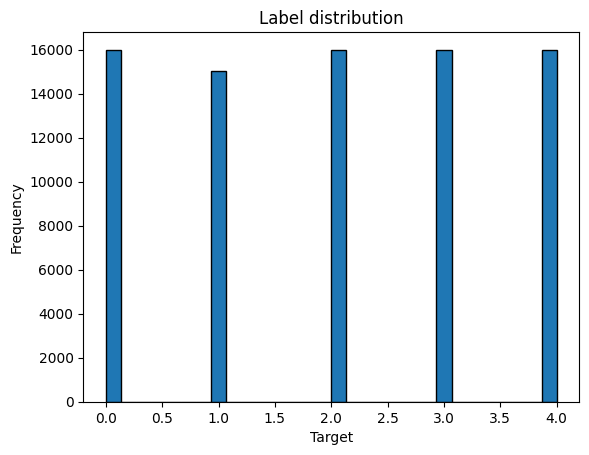

In [4]:
import matplotlib.pyplot as plt

plt.hist(filtered_df["Target"], bins=30, edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Label distribution')
plt.show()

In [ ]:
data.drop("Unnamed: 0", axis=1,inplace= True)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data_train,data_test=train_test_split(data, test_size=0.4)

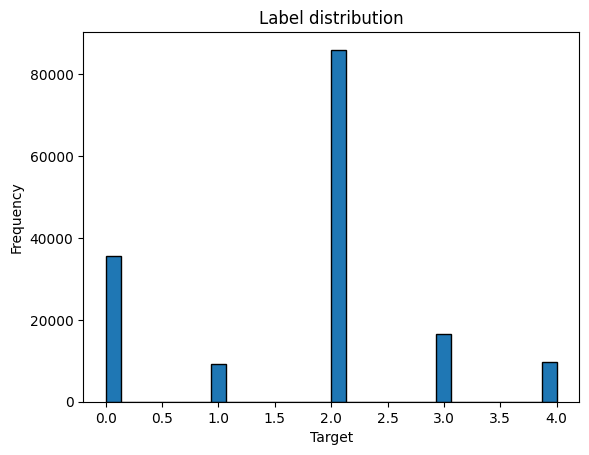

In [32]:
import matplotlib.pyplot as plt

plt.hist(data_train["Target"], bins=30, edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Label distribution')
plt.show()

In [33]:
data_train = data_train.sample(frac=1).reset_index(drop=True)

#define config

In [34]:
data_train

,Target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,7.814488,2.507398,0.499618,-1.527619,0.674124,0.207956,-0.588467,-0.031307,-0.047488,-0.216159,0.166140,0.107030,-0.106702,0.034179,0.051513,-0.071730
1,0,13.222132,5.958140,2.841054,-2.972332,2.194916,0.393516,-1.575096,-1.231279,-0.607382,0.275619,-1.151092,-0.734206,-0.274152,-0.300287,1.034515,1.122403
2,2,-0.874941,-3.695316,0.117717,-0.101850,-0.366113,-0.985734,-0.687480,-0.636169,0.020559,1.024754,0.258143,-0.335938,-0.167864,0.091946,0.472789,0.230559
3,0,6.143379,1.497224,-0.235337,-1.165062,0.157297,0.208087,-0.163573,0.463566,0.203231,-0.395829,0.825673,0.406569,-0.053098,0.211138,-0.571602,-0.225807
4,2,-5.599705,5.009502,0.452985,-3.951555,0.486248,-0.919438,2.660487,1.150662,0.075997,0.585271,-1.800079,0.444290,-0.663895,0.383150,0.909495,-2.293047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156917,2,-3.128987,3.916841,-3.505773,1.110009,2.178482,-1.745367,-0.169492,-0.381863,-0.311920,-1.075448,-0.111924,-0.239189,0.120517,0.214997,-0.133428,0.332324
156918,2,-0.542557,-2.905314,2.122078,1.305203,-2.380460,-2.110108,-1.666377,-0.550601,-1.002099,0.561476,-0.720909,0.399601,-0.400709,-1.085570,-1.437954,0.188188
156919,2,-1.160896,-3.820459,-0.629653,-0.546626,0.011936,-0.907919,-0.014787,-1.033568,0.299568,0.860462,0.178275,0.367020,0.485677,-1.039465,0.854770,0.605174
156920,3,-6.291049,4.441088,6.045661,0.280579,-2.732983,1.723433,-3.307279,-0.590035,0.913318,-2.617989,1.421828,-1.574718,1.458501,0.679348,0.533326,-0.456788


In [35]:
import torch
class config():
    def __init__(self):
        self.target_acc=0.75
        self.Gan_epochs=500
        self.noise_size=100
        self.n_features=16
        self.n_classes=5
        self.lrG=0.3
        self.lrD=0.003
        self.epochs=25
        self.classes=5
        self.batch_size=128
        self.G_batch_size=128
        self.GAC_batch_size=128
        self.learning_rate=0.001
        self.IID=False
        self.n_clients=16
        self.criterion=torch.nn.CrossEntropyLoss()
        self.Dropout_rate=0.1
        self.batch_norm=False
        self.synthetic_start_round= 10
        self.n_each_label=9000
conf=config()

In [36]:
print(conf.Gan_epochs)

500


In [37]:
import torch
import DL_model
import DL_model_batch
import sys
import torch.nn as nn
import MyGan as Gan
import os
from torch.utils.data import TensorDataset, DataLoader
import wandb
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import numpy as np

In [38]:
device=torch.device("cuda:0")
Gan=Gan.CGAN(conf,device)

In [39]:
model=DL_model.Net(0.0,device)

In [40]:
def model_fit(model,data,conf,criterion, round=""):
        if len(data)!=0:
            X=data[:,1:].float()
            y=data[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        else:
            X=self.trainset[:,1:].float()
            y=self.trainset[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        dataset=TensorDataset(X,y)
        dataloader=DataLoader(dataset, batch_size=128)
        his=model.fit(dataloader,conf.learning_rate,criterion,conf.epochs,f"client {2}",f"round {round}" )
        return his
Tensor=torch.tensor(data_train.values).to(device)
model_fit(model,Tensor,conf,conf.criterion)

accuracy for epoch 0 :  0.868852436542511
accuracy for epoch 1 :  0.8770491480827332
accuracy for epoch 2 :  0.868852436542511
accuracy for epoch 3 :  0.868852436542511
accuracy for epoch 4 :  0.868852436542511
accuracy for epoch 5 :  0.868852436542511
accuracy for epoch 6 :  0.8934425711631775
accuracy for epoch 7 :  0.8934425711631775
accuracy for epoch 8 :  0.8934425711631775
accuracy for epoch 9 :  0.8934425711631775
accuracy for epoch 10 :  0.8934425711631775
accuracy for epoch 11 :  0.8934425711631775
accuracy for epoch 12 :  0.8934425711631775
accuracy for epoch 13 :  0.8934425711631775
accuracy for epoch 14 :  0.9098359942436218
accuracy for epoch 15 :  0.8852458596229553
accuracy for epoch 16 :  0.8934425711631775
accuracy for epoch 17 :  0.8934425711631775
accuracy for epoch 18 :  0.9098359942436218
accuracy for epoch 19 :  0.9098359942436218
accuracy for epoch 20 :  0.9098359942436218
accuracy for epoch 21 :  0.9098359942436218
accuracy for epoch 22 :  0.9180327653884888
acc

{'loss': [1.5630306005477905,
  1.4532146453857422,
  1.351779818534851,
  1.320494294166565,
  1.1953812837600708,
  1.1350517272949219,
  1.0502556562423706,
  0.9970702528953552,
  0.8683142066001892,
  0.9350021481513977,
  0.9351270198822021,
  0.7952114939689636,
  0.8065832257270813,
  0.6605887413024902,
  0.6514386534690857,
  0.6564562916755676,
  0.6910098195075989,
  0.5680777430534363,
  0.5928874611854553,
  0.6069574952125549,
  0.554487407207489,
  0.5892602205276489,
  0.5131351351737976,
  0.7001006603240967,
  0.5365827083587646,
  0.3995559513568878,
  0.6072571873664856,
  0.4766450822353363,
  0.617327868938446,
  0.5817806720733643,
  0.41156259179115295,
  0.47387072443962097,
  0.35948994755744934,
  0.5154505968093872,
  0.5384960770606995,
  0.44818294048309326,
  0.5963676571846008,
  0.47695493698120117,
  0.5494620203971863,
  0.4831397235393524,
  0.5330289006233215,
  0.40365758538246155,
  0.49711138010025024,
  0.4075916111469269,
  0.3889557421207428,

In [54]:
for label in range(5):
    data_labels=data_test[data_test["Target"]==label]
    test_Tensor=torch.tensor(data_labels.values)
    y,X=test_Tensor[:,:1],test_Tensor[:,1:]
    y=y.squeeze()
    y=y.long()
    loss, accuracy, precision,  recall, f1, mcc=model.evaluate(X,y,conf.criterion)
    print(f"accuracy for label {label} : {accuracy}")

accuracy for label 0 : 0.9974945187568665
accuracy for label 1 : 0.6293929815292358
accuracy for label 2 : 0.7163087725639343
accuracy for label 3 : 0.8925204277038574
accuracy for label 4 : 0.8398768305778503


/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_

In [51]:
test_Tensor=torch.tensor(data_test.values)
y,X=test_Tensor[:,:1],test_Tensor[:,1:]
y=y.squeeze()
y=y.long()
loss, accuracy, precision,  recall, f1, mcc=model.evaluate(X,y,conf.criterion)

In [52]:
accuracy

0.8176038861274719

In [53]:
loss

0.4794436991214752